Loading the needed library and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path ='C:\\Users\\hp\\Desktop\\Global Superstore\\global_superstore_2016.xlsx'
df1 = pd.read_excel(path,sheet_name='Orders')
df2 = pd.read_excel(path,sheet_name='Returns')

df = pd.merge(df1,df2, on='Order ID', how='left')
df['Returned'] = df['Returned'].fillna('No')

In [3]:
df=df.drop(columns=['Region_y'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,No
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,No
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,No
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,No
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,No


Inspection

In [4]:
#Data profiling and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region_x        51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [5]:
#Summary
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373


In [6]:
#Check duplicates
df['Dup']=df.groupby(['Row ID','Order ID','Order Date','Customer ID','Customer Name','City','Product ID','Product Name','Sales','Quantity','Profit'])['Order ID'].rank(method='first').astype(int)
checkdup=df[df['Dup']>1]
checkdup

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Dup


Text(0, 0.5, 'Profit')

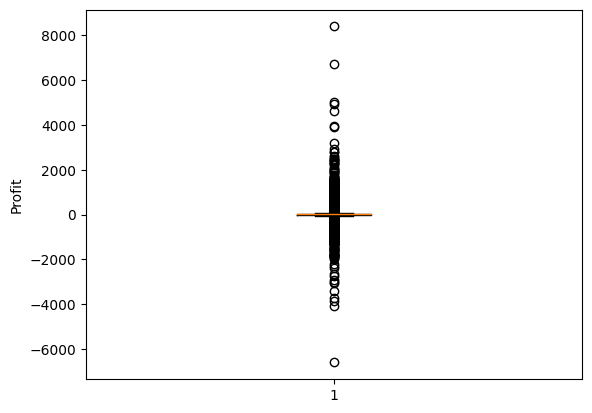

In [7]:
#Check outliers
plt.boxplot(df['Profit'])
plt.ylabel('Profit')

Text(0, 0.5, 'Sales')

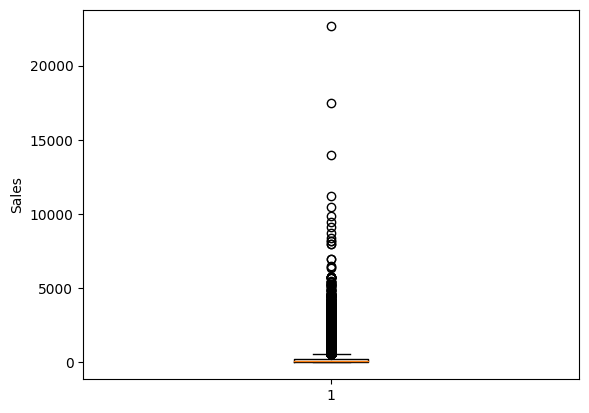

In [8]:
#Check outliers
plt.boxplot(df['Sales'])
plt.ylabel('Sales')

Transform

In [9]:
#Drop dup column
df=df.drop(columns=['Dup'])
# Rename all columns to lowercase also replace _ with space
df.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)
# Round number into 2 decimal
df['sales'] = df['sales'].round(2)
df['quantity'] = df['quantity'].round(2)
df['discount'] = df['discount'].round(2)
df['profit'] = df['profit'].round(2)
df['shipping_cost'] = df['shipping_cost'].round(2)

df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,No
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.39,9,0.1,-288.76,923.63,Critical,No
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,No
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,No
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,No


Save to new file

In [10]:
df.to_csv(r'C:\Users\hp\Desktop\Global Superstore\global_superstore_clean.csv', index=False)
df.to_excel(r'C:\Users\hp\Desktop\Global Superstore\global_superstore_clean.xlsx', index=False)